In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
(data, labels), _ = tf.keras.datasets.mnist.load_data()
data.shape, labels.shape

((60000, 28, 28), (60000,))

In [3]:
data = data.reshape((data.shape[0], -1))

Step1:  
Standardize the data  
(X - mean)/std  
This transforms each feature such that mean=0 and std=1

In [4]:
std_data = StandardScaler().fit_transform(data)

Step 2: Covariance matrix of std_data  
matrix of shape 784x784

In [5]:
cov = np.dot(std_data.T, std_data)
cov.shape

(784, 784)

Step 3:  
Find EigenVectors of Covariance matrix corresponding to the top 2 highest eigen values  

The below function eigh returns eigen values and corres eigen vectors sorted in ascending order  
the param subset_by_index is used to specify that we only need the top 2 Evals and Evectors

In [6]:
eig_vals, eig_vecs = eigh(cov, subset_by_index = [782, 783])
eig_vals.shape, eig_vecs.shape

((2,), (784, 2))

Step 4:The final Step    
Project all the points onto the eigen Vectors

In [7]:
data_2D = np.dot(std_data, eig_vecs)
assert data_2D.shape == (std_data.shape[0], eig_vecs.shape[1])

In [8]:
labels = labels.reshape(-1,1)
data_2D_with_labels = np.hstack((data_2D, labels))
data_2D_df = pd.DataFrame(data_2D_with_labels, columns=['Principal_f1', 'Principal_f2', 'class'])
data_2D_df.head(10)

,Principal_f1,Principal_f2,class
0,-4.814790,-0.922159,5.0
1,-7.754403,8.708977,0.0
2,9.431338,2.328389,4.0
3,-3.746318,-6.582173,1.0
4,3.133297,-5.183251,9.0
5,-3.068366,2.198402,2.0
6,0.823079,-6.773344,1.0
7,-5.406264,1.926909,3.0
8,0.191810,-7.822335,1.0
9,-4.726425,-3.227626,4.0


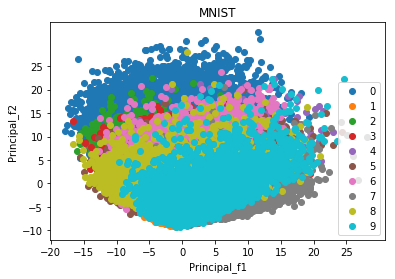

In [17]:
for class_ in range(0,10):
    filter_data = data_2D_df[data_2D_df['class'] == class_]
    plt.scatter(filter_data['Principal_f1'], filter_data['Principal_f2'], label=f'{class_}')
plt.xlabel("Principal_f1")
plt.ylabel('Principal_f2')
plt.title("MNIST")
plt.xticks(range(-20,30,5))
plt.yticks(range(-10,30,5))
plt.legend()
plt.show()

Can be easily seen that there is a lot of overlap among the classes from 1 - 9  
PCA is an old and weak technique